# Day 04

https://adventofcode.com/2018/day/4

## Get data into a usable form

In [40]:
import datetime
import operator
data = list()
with open('input.txt', 'r') as file:
  for line in file:
    split_line = line.strip().split(']')
    datetime_obj = datetime.datetime.strptime(split_line[0].strip('['), "%Y-%m-%d %H:%M")
    event = ''.join(split_line[1:]).strip()
    data.append([datetime_obj, event])
data.sort()
data[:10]

[[datetime.datetime(1518, 3, 16, 0, 4), 'Guard #1973 begins shift'],
 [datetime.datetime(1518, 3, 16, 0, 34), 'falls asleep'],
 [datetime.datetime(1518, 3, 16, 0, 39), 'wakes up'],
 [datetime.datetime(1518, 3, 16, 0, 52), 'falls asleep'],
 [datetime.datetime(1518, 3, 16, 0, 53), 'wakes up'],
 [datetime.datetime(1518, 3, 16, 0, 56), 'falls asleep'],
 [datetime.datetime(1518, 3, 16, 0, 59), 'wakes up'],
 [datetime.datetime(1518, 3, 16, 23, 57), 'Guard #1949 begins shift'],
 [datetime.datetime(1518, 3, 17, 0, 28), 'falls asleep'],
 [datetime.datetime(1518, 3, 17, 0, 41), 'wakes up']]

In [126]:
import collections
counts = collections.defaultdict(int)
sleep_times = list()
sleep_dict = collections.defaultdict(dict)
for row in data:
    current_time = row[0].minute
    event = row[1]
    if event.startswith('Guard'):
        guard = event.split()[1]
    elif event == 'falls asleep':
        sleep_times.append([guard, current_time])
        counts[guard] += 1
        if current_time not in sleep_dict[guard]:
            sleep_dict[guard][current_time] = 0 
        sleep_dict[guard][current_time] += 1
    elif event == 'wakes up':
        fell_asleep_time = sleep_times[-1][1]
        for minute in range(fell_asleep_time, current_time):
            sleep_times.append([guard, minute])
            counts[guard] += 1
            if minute not in sleep_dict[guard]:
                sleep_dict[guard][minute] = 0
            sleep_dict[guard][minute] += 1
guard_sleep_times = pd.DataFrame(sleep_times, columns=['guard', 'minute'])
guard_sleep_times.head()

,guard,minute
0,#1973,34
1,#1973,34
2,#1973,35
3,#1973,36
4,#1973,37


## Part 1

### Sleepiest guard

In [118]:
counts

defaultdict(int,
            {'#1973': 424,
             '#1949': 253,
             '#3529': 414,
             '#641': 525,
             '#1049': 324,
             '#1877': 215,
             '#2179': 283,
             '#379': 381,
             '#317': 467,
             '#2699': 128,
             '#2137': 232,
             '#2029': 258,
             '#2281': 310,
             '#193': 212,
             '#509': 297,
             '#3373': 275,
             '#2011': 250,
             '#853': 294,
             '#2693': 314,
             '#401': 185})

In [119]:
sleepiest_guard = guard_sleep_times.loc[guard_sleep_times['guard']=='#641'].set_index('guard')
sleepiest_guard

,minute
guard,
#641,4
#641,4
#641,5
#641,6
#641,7
#641,8
#641,9
#641,10
#641,11


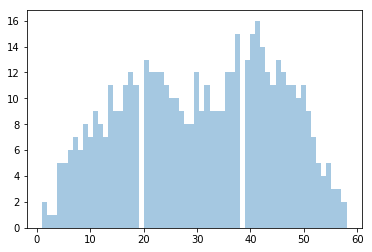

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(sleepiest_guard, bins=60, kde=False)

### Sleepiest minute

sleepiest_guard['minute'].value_counts().head()

### Part 1 answer

In [123]:
641 * 41

26281

## Part 2

### Find sleepiest minute for each guard

In [132]:
for guard in sleep_dict:
    sleepiest_time = max(sleep_dict[guard], key=lambda time: sleep_dict[guard][time])
    print(f'guard {guard}\ttime: {sleepiest_time}\tcount: {sleep_dict[guard][sleepiest_time]}')

guard #1973	time: 37	count: 20
guard #1949	time: 35	count: 10
guard #3529	time: 39	count: 12
guard #641	time: 41	count: 16
guard #1049	time: 41	count: 11
guard #1877	time: 42	count: 8
guard #2179	time: 23	count: 9
guard #379	time: 35	count: 12
guard #317	time: 42	count: 14
guard #2699	time: 37	count: 5
guard #2137	time: 24	count: 8
guard #2029	time: 35	count: 10
guard #2281	time: 46	count: 9
guard #193	time: 44	count: 7
guard #509	time: 54	count: 13
guard #3373	time: 39	count: 8
guard #2011	time: 40	count: 8
guard #853	time: 33	count: 10
guard #2693	time: 20	count: 10
guard #401	time: 40	count: 5


### Part 2 answer

In [133]:
1973 * 37

73001